In [21]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [22]:
!pip install matplotlib
!pip install -q keras
!pip install Cython
!pip install https://github.com/scikit-learn/scikit-learn/archive/master.zip

     \ 21.8MB 78.3MB/s
  Running setup.py bdist_wheel for scikit-learn ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ur5mtxr/wheels/9e/4b/7e/56798a5efcb7101fb6518d859ba612b4c38ff8be4898bdfb6f
Successfully built scikit-learn


In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import applications
from keras import backend as K
from sklearn.model_selection import train_test_split

In [24]:
!ls '/content/drive/My Drive/Works/Colaboratory/DoAI'

'4_RSNA Pneumonia Classification(3).ipynb'   X.pickle	    y.pickle
 X_256.pickle				     y_256.pickle


__Load the datasete from previous sections__

In [0]:
pickle_in = open('/content/drive/My Drive/Works/Colaboratory/DoAI/X.pickle','rb')
X = pickle.load(pickle_in)

In [0]:
pickle_in = open('/content/drive/My Drive/Works/Colaboratory/DoAI/y.pickle','rb')
y = pickle.load(pickle_in)

Let's try with 80% for training and 20% for validation.

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=101)

In [0]:
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 16
img_size = 180

In [29]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 178, 178, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 87, 87, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 64)        18496     
__________

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [0]:
train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)

In [32]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/20
600/600 [==============================] - 96s 160ms/step - loss: 0.6283 - acc: 0.6579 - val_loss: 0.5702 - val_acc: 0.7279
Epoch 2/20
600/600 [==============================] - 94s 156ms/step - loss: 0.5885 - acc: 0.7087 - val_loss: 0.5513 - val_acc: 0.7306
Epoch 3/20
600/600 [==============================] - 93s 155ms/step - loss: 0.5728 - acc: 0.7235 - val_loss: 0.5471 - val_acc: 0.7331
Epoch 4/20
600/600 [==============================] - 93s 155ms/step - loss: 0.5672 - acc: 0.7256 - val_loss: 0.5714 - val_acc: 0.7294
Epoch 5/20
600/600 [==============================] - 93s 156ms/step - loss: 0.5638 - acc: 0.7275 - val_loss: 0.5543 - val_acc: 0.7298
Epoch 6/20
600/600 [==============================] - 93s 156ms/step - loss: 0.5575 - acc: 0.7330 - val_loss: 0.5464 - val_acc: 0.7377
Epoch 7/20
600/600 [==============================] - 94s 156ms/step - loss: 0.5626 - acc: 0.7328 - val_loss: 0.5423 - val_acc: 0.7428
Epoch 8/20
600/600 [==============================] - 9

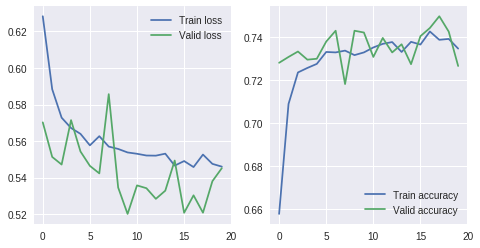

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["acc"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_acc"], label="Valid accuracy")
plt.legend()

__
Using a pre-trained network__

In [0]:
img_width, img_height = 180, 180
epochs = 20
batch_size = 16

In [0]:
K.clear_session()

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

top_model = Sequential()
top_model.add(layers.Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(layers.Dense(256, activation='relu'))
top_model.add(layers.Dense(1, activation='sigmoid'))

Compile the model with a SGD/momentum optimizer and a very slow learning rate.

In [0]:
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 180, 180, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0         
__________

In [38]:
history_2 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=2, workers=12)

Epoch 1/20
 - 211s - loss: 0.5437 - acc: 0.7264 - val_loss: 0.5015 - val_acc: 0.7549
Epoch 2/20
 - 205s - loss: 0.5113 - acc: 0.7562 - val_loss: 0.4840 - val_acc: 0.7616
Epoch 3/20
 - 205s - loss: 0.4952 - acc: 0.7626 - val_loss: 0.5164 - val_acc: 0.7503
Epoch 4/20
 - 205s - loss: 0.4821 - acc: 0.7715 - val_loss: 0.5184 - val_acc: 0.7411
Epoch 5/20
 - 206s - loss: 0.4741 - acc: 0.7754 - val_loss: 0.4711 - val_acc: 0.7595
Epoch 6/20
 - 206s - loss: 0.4687 - acc: 0.7782 - val_loss: 0.4628 - val_acc: 0.7755
Epoch 7/20
 - 206s - loss: 0.4651 - acc: 0.7784 - val_loss: 0.4774 - val_acc: 0.7692
Epoch 8/20
 - 206s - loss: 0.4578 - acc: 0.7837 - val_loss: 0.4644 - val_acc: 0.7700
Epoch 9/20
 - 206s - loss: 0.4573 - acc: 0.7851 - val_loss: 0.4493 - val_acc: 0.7817
Epoch 10/20
 - 206s - loss: 0.4452 - acc: 0.7904 - val_loss: 0.4604 - val_acc: 0.7704
Epoch 11/20
 - 206s - loss: 0.4468 - acc: 0.7935 - val_loss: 0.4583 - val_acc: 0.7742
Epoch 12/20
 - 206s - loss: 0.4423 - acc: 0.7939 - val_loss: 0.

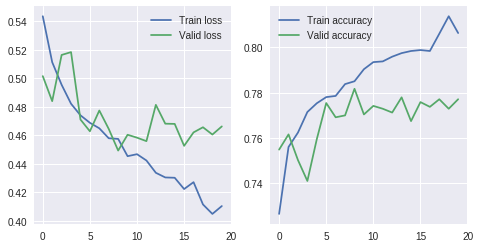

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history_2.epoch, history_2.history["loss"], label="Train loss")
plt.plot(history_2.epoch, history_2.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history_2.epoch, history_2.history["acc"], label="Train accuracy")
plt.plot(history_2.epoch, history_2.history["val_acc"], label="Valid accuracy")
plt.legend()

In [0]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

- This approach get me to a validation accuracy of __0.77-0.78__ after 20 epochs. 
- It seem the overfitting on training set. 
- Ten epochs seemed to be optimal to prevent overfitting on the tranining set after experimenting with different number of epochs.
- Here are a few more approaches we can try to get a better results:
  - More aggresive data augmentation.
  - Fine-tuning more convolutional block.
  - Try to using different pre-trained network such as RESNET52, InceptionV3, Xception, DenseNet121.